In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Load the dataset

In [5]:
dataset = pd.read_csv("heart.csv")

In [4]:
dataset.head() # The first five observations from the dataset.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
dataset.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


The above table shows how correlated the factor variables are.

<AxesSubplot:>

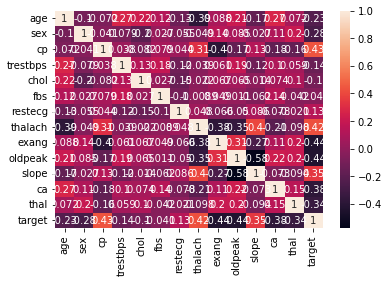

In [7]:
import seaborn as sns 
sns.heatmap(dataset.corr(),annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

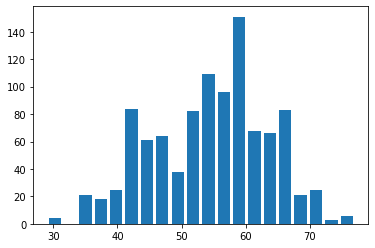

In [8]:
import matplotlib.pyplot as plt

plt.hist(dataset['age'],bins=20,rwidth=0.8)
plt.show


In [9]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
x.mean()

45.334506566604134

splitting of dataset

In [10]:
X = dataset.drop(['target'], axis=1)
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

In [14]:
y_pred = model.predict(X_test)


In [15]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.7853658536585366
Confusion Matrix:
[[71 31]
 [13 90]]


This is a 2x2 confusion matrix that shows the performance of a binary classification model, where the model is predicting the presence or absence of a particular condition, disease, or outcome.

In this case, the confusion matrix can be interpreted as follows:

True Positives (TP): There are 90 samples that are actually positive and are also predicted as positive by the model. These are the samples in the bottom right quadrant of the matrix.

False Positives (FP): There are 31 samples that are actually negative, but are predicted as positive by the model. These are the samples in the top right quadrant of the matrix.

False Negatives (FN): There are 13 samples that are actually positive, but are predicted as negative by the model. These are the samples in the bottom left quadrant of the matrix.

True Negatives (TN): There are 71 samples that are actually negative and are also predicted as negative by the model. These are the samples in the top left quadrant of the matrix.

In summary, the confusion matrix shows that the model predicted 90 true positives and 71 true negatives. However, it also made 31 false positive predictions and 13 false negative predictions. In order to evaluate the performance of a model, we need to consider metrics such as accuracy, precision, recall, and F1-score.






In [18]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
ac

84.8249027237354

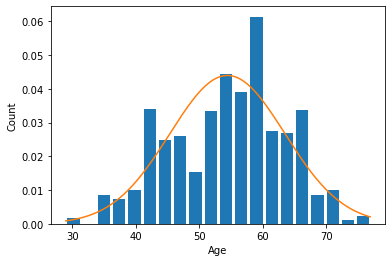

In [19]:
from scipy.stats import norm
import numpy as np
plt.hist(dataset["age"],bins=20, rwidth=0.8, density=True)
plt.xlabel('Age')
plt.ylabel('Count')



rng = np.arange(dataset["age"].min(), dataset["age"].max(), 0.1)
plt.plot(rng, norm.pdf(rng,dataset["age"].mean(),dataset["age"].std()))

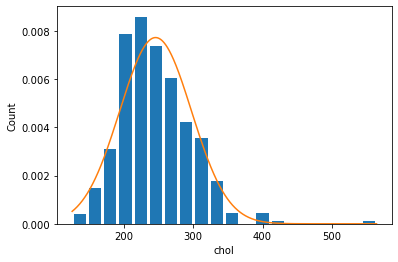

In [20]:
from scipy.stats import norm
import numpy as np
plt.hist(dataset["chol"],bins=20, rwidth=0.8, density=True)
plt.xlabel('chol')
plt.ylabel('Count')



rng = np.arange(dataset["chol"].min(), dataset["chol"].max(), 0.1)
plt.plot(rng, norm.pdf(rng,dataset["chol"].mean(),dataset["chol"].std()))


In [21]:
upper_limit = dataset["age"].mean() + 3*dataset["age"].std()
upper_limit

81.65101704119627

In [23]:
lower_limit = dataset["age"].mean() - 3*dataset["age"].std()
lower_limit

27.217275641730573

In [24]:
data_Outlier=dataset[(dataset["age"]>upper_limit) | (dataset["age"]<lower_limit)]
data_Outlier

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [25]:
#Outlier Detection using Range Concepts
dataset_std=dataset[(dataset["age"]<75) & (dataset["age"]>35)]
dataset_std

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [26]:
from sklearn.preprocessing import StandardScaler
s1=StandardScaler()
x=s1.fit_transform(x)

In [27]:
x


array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [29]:
y_pred=l1.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0])

In [30]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_test,y_pred)*100
ac1

80.48780487804879

# MinMaxScaler

In [31]:
from sklearn.preprocessing import MinMaxScaler


In [32]:
# Split the data
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [33]:
m1=MinMaxScaler()
x=m1.fit_transform(x)


In [34]:
x.min()


0.0

In [ ]:
# Select the algorithm
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)



In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Tune the hyperparameters
# ...

# Make predictions
new_data = pd.DataFrame([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]], columns=X.columns)
y_new_pred = model.predict(new_data)
print(y_new_pred)

# Naive Bayes

In [40]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [38]:
 X = dataset.drop('target', axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [42]:
y_pred = model.predict(X_test)


In [43]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8


In [44]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)

Confusion Matrix: [[72 30]
 [11 92]]


This confusion matrix is showing the performance of a binary classification model that predicted whether a person has a heart disease or not. The confusion matrix has four elements as follows:

True Positive (TP): the number of actual positive cases that were correctly predicted as positive. In this case, it is 72.
False Positive (FP): the number of actual negative cases that were incorrectly predicted as positive. In this case, it is 30.
False Negative (FN): the number of actual positive cases that were incorrectly predicted as negative. In this case, it is 11.
True Negative (TN): the number of actual negative cases that were correctly predicted as negative. In this case, it is 92.
So, based on this confusion matrix, we can interpret the following:

72 cases were correctly classified as positive (i.e., having heart disease) and 92 cases were correctly classified as negative (i.e., not having heart disease).
30 cases were falsely classified as positive (i.e., predicted as having heart disease when they do not have it) and 11 cases were falsely classified as negative (i.e., predicted as not having heart disease when they actually have it).
The total number of correct predictions is 72 + 92 = 164 and the total number of incorrect predictions is 30 + 11 = 41.
The overall accuracy of the model can be calculated as (TP+TN)/(TP+TN+FP+FN) = (72+92)/(72+92+30+11) = 0.81 or 81%.





# Linear Discriminant analysis

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [46]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [47]:
y_pred = model.predict(X_test)


In [48]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8195121951219512


In [49]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)


Confusion Matrix: [[72 30]
 [ 7 96]]


#This confusion matrix is showing the performance of a binary classification model that predicted whether a person has a heart disease or not. The confusion matrix has four elements as follows:

True Positive (TP): the number of actual positive cases that were correctly predicted as positive. In this case, it is 72.
False Positive (FP): the number of actual negative cases that were incorrectly predicted as positive. In this case, it is 30.
False Negative (FN): the number of actual positive cases that were incorrectly predicted as negative. In this case, it is 7.
True Negative (TN): the number of actual negative cases that were correctly predicted as negative. In this case, it is 96.
So, based on this confusion matrix, we can interpret the following:

72 cases were correctly classified as positive (i.e., having heart disease) and 96 cases were correctly classified as negative (i.e., not having heart disease).
30 cases were falsely classified as positive (i.e., predicted as having heart disease when they do not have it) and 7 cases were falsely classified as negative (i.e., predicted as not having heart disease when they actually have it).
The total number of correct predictions is 72 + 96 = 168 and the total number of incorrect predictions is 30 + 7 = 37.
The overall accuracy of the model can be calculated as (TP+TN)/(TP+TN+FP+FN) = (72+96)/(72+96+30+7) = 0.84 or 84%.
Comparing this confusion matrix with the previous one, we can see that the number of false negatives has decreased (from 11 to 7) and the number of true negatives has increased (from 92 to 96), which has improved the overall performance of the model.







In [50]:
from sklearn.tree import DecisionTreeClassifier


In [51]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.9853658536585366


In [53]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)



Confusion Matrix: [[102   0]
 [  3 100]]


True Positive (TP): The model correctly predicted the positive class (class 1). In this case, the model predicted class 1 for 102 instances, and all of them were actually class 1.

False Negative (FN): The model incorrectly predicted the negative class (class 0), when it should have predicted positive class (class 1). In this case, the model predicted class 0 for 3 instances, but they were actually class 1.

False Positive (FP): The model incorrectly predicted the positive class (class 1), when it should have predicted the negative class (class 0). In this case, the model predicted class 1 for 0 instances, but they were actually class 0.

True Negative (TN): The model correctly predicted the negative class (class 0). In this case, the model predicted class 0 for 100 instances, and all of them were actually class 0.

So, the confusion matrix [[102 0], [3 100]] represents a scenario where the model predicted 102 instances as class 1, and all of them were actually class 1, while it predicted 3 instances as class 0, but they were actually class 1. It also predicted 100 instances as class 0, and all of them were actually class 0.

This suggests that the model is performing well in predicting both classes, with a high number of true positives and true negatives, and a low number of false positives and false negatives.







K-Nearest Neighbour Algorithm

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
y_pred = model.predict(X_test)


In [57]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7317073170731707


In [58]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)

Confusion Matrix: [[74 28]
 [27 76]]


Support vector machine

In [59]:
from sklearn.svm import SVC


In [60]:
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [61]:
y_pred = svm_model.predict(X_test)


In [62]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8048780487804879
Confusion Matrix:
[[72 30]
 [10 93]]


The rows represent the actual class labels for the test data, where 0 and 1 are the two possible classes.
The columns represent the predicted class labels for the test data, where 0 and 1 are the two possible classes.
The values in the matrix represent the number of instances that belong to each category.
The top left cell (72) represents the number of instances that were correctly classified as 0 (true negatives).
The top right cell (30) represents the number of instances that were incorrectly classified as 1 (false positives).
The bottom left cell (10) represents the number of instances that were incorrectly classified as 0 (false negatives).
The bottom right cell (93) represents the number of instances that were correctly classified as 1 (true positives).
In summary, the confusion matrix shows that out of a total of 205 test instances, the model correctly classified 72 as negative (0), and 93 as positive (1). However, it incorrectly classified 30 as positive when they were actually negative, and 10 as negative when they were actually positive.

The confusion matrix provides a useful summary of the model's performance, which can be used to calculate various performance metrics such as accuracy, precision, recall, and F1-score.







# Neural Network.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_pred = (y_pred > 0.5)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))